# Introduction

Notebook to analyse the PyBossa taskruns from the Volunteers App. The analysis made on this notebook is needed once a number of volunteers participating of the empirical study, changed during the execution time, becoming necessary to rerun some tasks to distribute more equally the amount of tasks by volunteer.

**The final amount should be around 10 tasks/volunteer.**

# Load Libraries and Data

In [21]:
import pandas as pd
import seaborn as sns

taskruns = pd.read_csv('../data/mozilla_firefox_v2/firefoxDataset/br_feat_recovery_empirical_study/pybossa-apps/recover_taskruns/taskruns.csv')
print('TaskRuns shape: {}'.format(taskruns.shape))

TaskRuns shape: (85, 10)


In [22]:
taskruns.head()

,bug_id,user_id,task_id,created,finish_time,user_ip,link,timeout,project_id,id
0,1181835,None,1628,2019-02-22T13:30:47.532426,2019-02-22T13:34:43.593370,148.58.130.242,<link rel='self' title='taskrun' href='http://...,None,7,143
1,1248267,None,1629,2019-02-22T13:30:47.612225,2019-02-22T13:36:41.537585,148.58.130.242,<link rel='self' title='taskrun' href='http://...,None,7,144
2,1248268,None,1630,2019-02-22T13:34:43.629663,2019-02-22T13:37:54.519444,148.58.130.242,<link rel='self' title='taskrun' href='http://...,None,7,145
3,1257087,None,1631,2019-02-22T13:36:41.567089,2019-02-22T13:38:58.780731,148.58.130.242,<link rel='self' title='taskrun' href='http://...,None,7,146
4,1264988,None,1632,2019-02-22T13:37:54.548454,2019-02-22T13:40:18.103423,148.58.130.242,<link rel='self' title='taskrun' href='http://...,None,7,147


# Selecting Tasks to Rerun

In [23]:
taskruns['created'] = pd.to_datetime(taskruns['created'], yearfirst=True)
taskruns['created_month'] = taskruns.apply(lambda row: row['created'].month, axis=1)
taskruns['created_day'] = taskruns.apply(lambda row: row['created'].day, axis=1)
taskruns['created_hour'] = taskruns.apply(lambda row: row['created'].hour, axis=1)

grouped_trs = taskruns.groupby(by=['created_month','created_day','created_hour']).count()
grouped_trs

bug_id  user_id  task_id  created  \
created_month created_day created_hour                                      
2             22          13                15       15       15       15   
                          14                 7        7        7        7   
                          15                 8        8        8        8   
              25          12                12       12       12       12   
                          18                20       20       20       20   
                          19                 1        1        1        1   
              26          17                10       10       10       10   
                          19                12       12       12       12   

                                        finish_time  user_ip  link  timeout  \
created_month created_day created_hour                                        
2             22          13                     15       15    15       15   
                          14                      7        7     7        7   
                          15                      8        8     8        8   
              25          12                     12       12    12       12   
                          18                     20       20    20       20   
                          19                      1        1     1        1   
              26          17                     10       10    10       10   
                          19                     12       12    12       12   

                                        project_id  id  
created_month created_day created_hour                  
2             22          13                    15  15  
                          14                     7   7  
                          15                     8   8  
              25          12                    12  12  
                          18                    20  20  
                          19                     1   1  
              26          17                    10  10  
                          19                    12  12

## Volunteers Contributions

In [24]:
trs_p1 = taskruns[(taskruns.created_day == 22) & (taskruns.created_hour==13)].loc[:,'task_id']
trs_p2 = taskruns[(taskruns.created_day == 22) & ((taskruns.created_hour==14) | (taskruns.created_hour == 15))].loc[:,'task_id']
trs_p3 = taskruns[(taskruns.created_day == 25) & (taskruns.created_hour==12)].loc[:,'task_id']
trs_p4 = taskruns[(taskruns.created_day == 25) & ((taskruns.created_hour==18) | (taskruns.created_hour == 19))].loc[:,'task_id']
trs_p5 = taskruns[(taskruns.created_day == 26) & (taskruns.created_hour == 17)].loc[:,'task_id']
trs_p6 = taskruns[(taskruns.created_day == 26) & (taskruns.created_hour == 19)].loc[:,'task_id']

contri_df = pd.DataFrame(columns=['contributor','answers'])
contri_df['contributor'] = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
contri_df['answers'] = [trs_p1.values, trs_p2.values, trs_p3.values, trs_p4.values, trs_p5.values, trs_p6.values]
contri_df['amount_answered'] = contri_df.apply(lambda row : len(row['answers']), axis=1)
contri_df

,contributor,answers,amount_answered
0,p1,"[1628, 1629, 1630, 1631, 1632, 1633, 1634, 163...",15
1,p2,"[1643, 1644, 1645, 1646, 1647, 1648, 1649, 165...",15
2,p3,"[1658, 1659, 1660, 1661, 1662, 1663, 1664, 166...",12
3,p4,"[1670, 1671, 1672, 1673, 1674, 1675, 1676, 167...",21
4,p5,"[1639, 1640, 1641, 1642, 1654, 1655, 1656, 165...",10
5,p6,"[1681, 1682, 1683, 1684, 1685, 1686, 1687, 168...",12


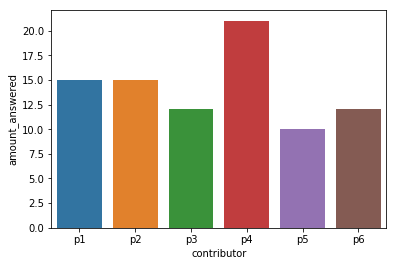

In [25]:
sns.barplot(data=contri_df, y=contri_df['amount_answered'], x=contri_df['contributor'])

## Expected composition of resolution of tasks:

* Lucas    - P1: 11 tasks
* Marcos   - P2: 11 tasks
* Diego    - P3: 10 tasks
* Isabelly - P4: 11 tasks
* Anderson - P5: 10 tasks
* Wesley   - P6: 10 tasks
* MatheusB - P8: 10 tasks
* MatheusG - P7: 10 tasks
* Jaziel   - P9: 10 tasks

**Total: 93 tasks**

In [26]:
contrib_10 = ['p4','p5','p7','p8','p6','p9']
contrib_11 = ['p1','p2','p3']

def tasks_to_rerun(row):
    if row['contributor'] in contrib_10:
        if len(row['answers']) > 10:
            return row['answers'][10:]
        else:
            return []
    else:
        if row['contributor'] in contrib_11:
            if len(row['answers']) > 11:
                return row['answers'][11:]
            else:
                return []

contri_df['tasks_to_rerun'] = contri_df.apply(lambda row : tasks_to_rerun(row), axis=1)
contri_df['solved_tasks_range'] = contri_df.apply(lambda row : (row['answers'][0], row['answers'][-1]), axis=1)
contri_df

,contributor,answers,amount_answered,tasks_to_rerun,solved_tasks_range
0,p1,"[1628, 1629, 1630, 1631, 1632, 1633, 1634, 163...",15,"[1639, 1640, 1641, 1642]","(1628, 1642)"
1,p2,"[1643, 1644, 1645, 1646, 1647, 1648, 1649, 165...",15,"[1654, 1655, 1656, 1657]","(1643, 1657)"
2,p3,"[1658, 1659, 1660, 1661, 1662, 1663, 1664, 166...",12,[1669],"(1658, 1669)"
3,p4,"[1670, 1671, 1672, 1673, 1674, 1675, 1676, 167...",21,"[1680, 1681, 1682, 1683, 1684, 1685, 1686, 168...","(1670, 1690)"
4,p5,"[1639, 1640, 1641, 1642, 1654, 1655, 1656, 165...",10,[],"(1639, 1669)"
5,p6,"[1681, 1682, 1683, 1684, 1685, 1686, 1687, 168...",12,"[1691, 1692]","(1681, 1692)"


## Tasks To Rerun

In [27]:
for arr in contri_df.tasks_to_rerun.values:
    print('Tasks to Rerun: {}'.format(arr))

Tasks to Rerun: [1639 1640 1641 1642]
Tasks to Rerun: [1654 1655 1656 1657]
Tasks to Rerun: [1669]
Tasks to Rerun: [1680 1681 1682 1683 1684 1685 1686 1687 1688 1689 1690]
Tasks to Rerun: []
Tasks to Rerun: [1691 1692]
